# Ratchet

Dou, Dhatt-Gauthier, and Bishop built a series of Markov models of dynamical function (Curr. Opin. Sol. State Mat. Sci. 23 (2019)). One of these represents an electrochemical ratchet. This ratchet involves two electrodes and a particle going between these electrodes. There are four states in this model to represent the motion of the particle going between the two electrodes and the charge transfer involved in this.

The rate matrix of this four-state Markov model is
\begin{equation}
R= 
\left(\begin{matrix}
-(k_{c}+\gamma k_{m} e^{-F+fd/2}) & k_{c}e^{F-A/2} & 0 & \gamma k_{m} \\
k_{c} & -(k_{m}+k_{c}e^{F-A/2}) & k_{m}e^{-F-fd/2} & 0 \\
0 & k_{m} & -(k_{c}+k_{m}e^{-F-fd/2}) & k_{c}e^{F-A/2} \\
\gamma k_{m}e^{-F-fd/2} & 0 & k_{c} & -(\gamma k_{m} + k_{c}e^{F-A/2}).
\end{matrix}\right) \label{ratchet_rates}
\end{equation}
The parameters of this model are as follows.

-> $k_{c}$ = kinetic rate constant for charge transfer

-> $k_{m}$ = kinetic rate constant for particle motion

-> $F$ = difference between energy levels

-> $f$ = load

-> $z$ = period

-> $A$ = affinity

-> $\gamma$ = constant for directionality

This model differs from the electrochemical clock model in that there is an applied load ($f$) with some period ($d$). It has three additional parameters to represent this: $f$ is the applied load, $z$ is the period, and $\gamma$ is the directionality (set to a value much smaller than 1 to ensure forward motion).
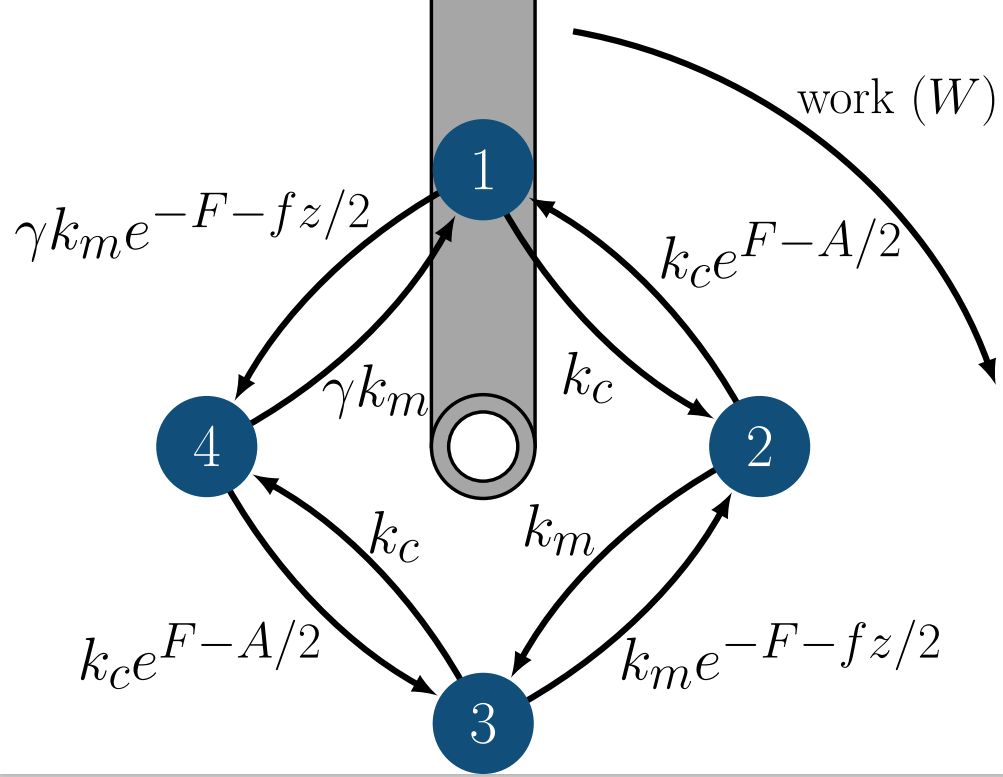

Let us now assume that we want this ratchet to produce large amounts of work/power very quickly and with minimal cost. The speed, dissipation, work, and power can be quantified over a path-- a sequence of time-ordered states representing the path a particle takes between these two electrodes and the charge of that particle.
For some path $\mathcal{C}_{n}=x_{0},x_{1},x_{2},...,x_{n-1},x_{n}$, the speed of that path is given by the sum of the mean time waiting in each state along the path:
\begin{equation}
\langle 1 / \tau \rangle_{\mathcal{C}_{n}}=\sum_{i=0}^{n} \frac{1}{w_{x_{i}}}
\end{equation}
The entropy dissipated by traversal of a single path is given by the negative of the entropy flow:
\begin{equation}
-s_{e}[\mathcal{C}_{n}]=-\ln \frac{\prod_{i=1}^{n} w(x_{i} \vert x_{i-1})}{\prod_{j-1}^{n} w(x_{j-1} \vert x_{j})}
\end{equation}
The work produced by a path is given by
\begin{equation}
W_{\mathcal{C}_{n}}=0,\pm \mathcal{R}fz
\end{equation}
The work is zero when a path does not go around the cycle fully (in either direction). If a path does completely traverse the cycle, such as by 12341 or 14321, the work output is either $-fz$ in the favored direction or $fz$ in the unfavored direction, using the sign convention that negative work denotes work done by the system.
With each additional cycle traversal within a single path, an additional increment of work $\pm fz$ is done.
Work done on the system and by the system cancel each other out, so the net number of cycle traversals in a particular direction are what matter for this determination.
The power can then be determined from the work and the mean occurrence time of a path:
\begin{equation}
P_{\mathcal{C}_{n}}=\frac{W_{\mathcal{C}_{n}}}{\langle \tau \rangle_{\mathcal{C}_{n}}}
\end{equation}

These path-level observables can be averaged over a group of paths, an ensemble.
We are interested in the trend of these observables in time, so we will create groups of paths that are binned in time based on their mean occurrence time $\langle \tau \rangle_{\mathcal{C}_{n}}$. The value of each paths' mean occurrence time will fall into a single uniform-length ($\Delta t$) time bin. The observables $\mathcal{O}_{\mathcal{C}_{n}}$ of these paths can then be averaged to a single value representing that point in time:
\begin{equation}
\langle \mathcal{O} \rangle_{t}=\sum_{t}^{t+\Delta t} \mathcal{O}_{\mathcal{C}_{n}} p(\mathcal{C}_{n},\langle \tau \rangle_{\mathcal{C}_{n}})
\end{equation}
This yields a time series of values of each observable. These time series are plotted below for the speed, dissipation, and work output.

Number of paths is 170
Length of longest path is 9


Text(0.5, 0, 'Time')

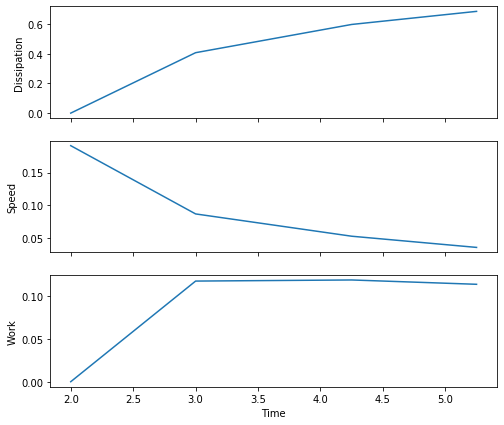

In [6]:
import math
import matplotlib
import matplotlib.pyplot as plt

# Parameter values
km = 1
kc = 1
F = 1
A = 1
gamma = 0.001
fd = 2

# Size of time bins
dt = 0.25

#Declarations
temp = []
paths = []
allpaths = []
newpaths = []
prob = []
time = []
speed = []
diss = []
power = []
work = []
R = []
wx = []
t_time = []
t_speed = []
t_diss = []
t_work = []
t_power = []
t_mtime = []
occ = []
ef = []
wks = []
probs = []

# Path generation
paths = [[1,2],[1,4]]
nmax = 10
npath = 0
for i in range(2,nmax):
    newpaths.clear()
    for j in range(0,len(paths),1):
        if (paths[j][-1] == 1) or (paths[j][-1] == 3):
            temp.clear()
            temp = list(paths[j])
            temp.append(2)
            newpaths.append(list(temp))
            del temp[-1]
            temp.append(4)
            newpaths.append(list(temp))
        elif (paths[j][-1] == 2) or (paths[j][-1] == 4):
            temp.clear()
            temp = list(paths[j])
            temp.append(1)
            newpaths.append(list(temp))
            allpaths.append(list(temp))
            temp.pop()
            temp.append(3)
            newpaths.append(list(temp))
            npath+=1
        else:
            print("Invalid state!\n")
    paths.clear()
    paths = list(newpaths)
            
print("Number of paths is",npath)
print("Length of longest path is",len(allpaths[-1]))
#print(allpaths)

# Rate matrix and escape rates
R = [[float(0)]*4]*4
R[0]=[-1 * (kc + gamma * km * math.exp(-1 * F+(fd/2))),kc,0,km * math.exp(-1*F+(fd/2))]#1
R[1]= [float(kc*math.exp(F-(A/2))),float(-km-kc*math.exp(F-(A/2))),float(km),float(0)]#2
R[2]= [float(0),float(km*math.exp(-1*F)),float(-kc-km*math.exp(-1*F)),float(kc)]#3
R[3]= [float(gamma *km),float(0),float(kc*math.exp(F-(A/2))),float(-(gamma*km)-kc*math.exp(F-(A/2)))]#4
wx.append(float(kc + (km*(math.exp(-1*F)))))#1
wx.append(float(km + kc*(math.exp(F-(A/2)))))#2
wx.append(float(kc + (km * (math.exp(-1*F)))))#3
wx.append(float(km + kc*math.exp(F-(A/2))))#4

# Observable determination along paths
margp = 1
time = []
speed = []
diss = []
prob = []
work = []
power = []
for i in range(0,len(allpaths),1):
    time.append(float(0))
    for j in range(0,len(allpaths[i]),1):
        time[i]+=(1/wx[int(allpaths[i][j]-1)])
    speed.append(float(1/time[i]))
    prob.append(float(1))
    for j in range(1,len(allpaths[i]),1):
        prob[i] = prob[i] * float(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/wx[int(allpaths[i][j-1]-1)])
    diss.append(float(1))
    for j in range(1,len(allpaths[i]),1):
        extra = float(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)])
        diss[i]*=float(extra)
        extra = float(R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)])
        diss[i]/=float(extra)
        #diss[i]-=float(math.log(R[int(allpaths[i][j-1]-1)][int(allpaths[i][j]-1)]/R[int(allpaths[i][j]-1)][int(allpaths[i][j-1]-1)]))
    diss[i] = float(math.log(diss[i]))
    work.append(float(0))
    ct = 0
    marker = 1
    for j in range(2,len(allpaths[i]),1):
        if (allpaths[i][j] == 1) and (allpaths[i][marker] != allpaths[i][j-1]):
            if allpaths[i][marker] == 2:
                work[i]-=float(1)
            else:
                work[i]+=float(1)
            marker = j+1
    work[i]*=float(fd)
    power.append(float(0))
    power[i] = float(work[i]/time[i])

sumpr = float(0)
for i in range(0,len(allpaths),1):
    sumpr+=float(prob[i])
for i in range(0,len(allpaths),1):
    prob[i]/=float(sumpr)
    
# Average to time ensemble
nt = math.ceil(max(time)/dt)
t_time = [float(0)]*(nt+1)
for i in range(0,nt+1):
    t_time[i]=i*dt
#t_time = list(range(0,dt*nt,dt))
t_speed = [float(0)]*nt
t_diss = [float(0)]*nt
t_work = [float(0)]*nt
t_power = [float(0)]*nt
t_mtime = [float(0)]*nt
for i in range(0,len(t_time)-1,1):
    occ.clear()
    ef.clear()
    probs.clear()
    wks.clear()
    for j in range(0,len(allpaths),1):
        if (time[j] >= t_time[i]) and (time[j] <= t_time[i+1]):
            occ.append(float(time[j]))
            ef.append(float(diss[j]))
            probs.append(float(prob[j]))
            wks.append(float(work[j]))
    t_speed[i] = float(0)
    t_diss[i] = float(0)
    t_mtime[i] = float(0)
    t_work[i] = float(0)
    t_power[i] = float(0)
    for j in range(0,len(occ),1):
        extra = float(probs[j] * occ[j])
        t_mtime[i]+=float(extra)
        if occ[j] > 0:
            extra=float(probs[j]/occ[j])
            t_speed[i]+=float(extra)
        extra=float(probs[j] * ef[j])
        t_diss[i]+=float(extra)
        extra = float(probs[j]*wks[j])
        t_work[i]+=float(extra)
        extra = float(probs[j]*wks[j]/occ[j])
        t_power[i]+=float(extra)
        
# Time ensemble neglecting zero elements
finaltimes = list(t_time)
del finaltimes[0]
for i in range(len(t_speed)-1,-1,-1):
    if t_mtime[i] == 0:
        del t_speed[i]
        del t_diss[i]
        del t_mtime[i]
        del t_work[i]
        del t_power[i]
        del finaltimes[i]

# Plots
fig = plt.figure(figsize=(8,7))
ax = fig.subplots(sharex=True,sharey=False,ncols=1,nrows=3)
plt.sca(ax[0])
ax[0].plot(finaltimes,t_diss)
ax[0].set_ylabel('Dissipation')
plt.sca(ax[1])
ax[1].plot(finaltimes,t_speed)
ax[1].set_ylabel('Speed')
plt.sca(ax[2])
ax[2].plot(finaltimes,t_work)
ax[2].set_ylabel('Work')
ax[2].set_xlabel('Time')

Each of our three key observables has a trend in time, shown above. The dissipation increases in time, the speed decreases in time, and the work increases in time. This means that on short timescales, speed is good with minimal dissipation. However, minimal work is output at these times. Conversely, long times have much greater work output but at slow speeds and with significantly increased dissipative cost.